In [2]:
#clear all varaibles
%reset

In [7]:
import ROOT

ModuleNotFoundError: No module named 'ROOT'

In [2]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
from scipy.optimize import brentq

In [3]:
d0_en = []
d0_ang = []

# opening the CSV file  
with open('d_0.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        
        d0_en.append(float(lines[0]))
        d0_ang.append(float(lines[1]))

d2_en = []
d2_ang = []

# opening the CSV file  
with open('d_2.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        
        d2_en.append(float(lines[0]))
        d2_ang.append(float(lines[1]))

d4_en = []
d4_ang = []

# opening the CSV file  
with open('d_4.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        
        d4_en.append(float(lines[0]))
        d4_ang.append(float(lines[1]))

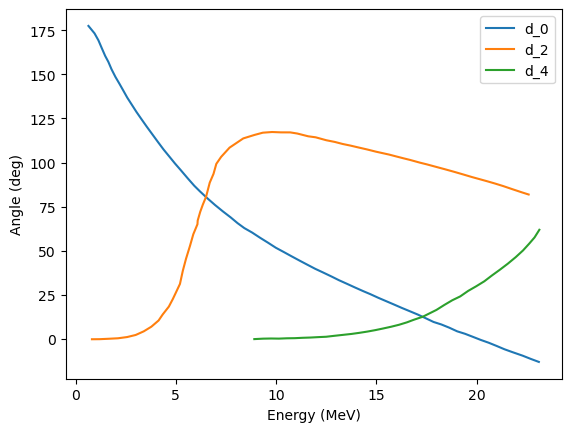

In [4]:
plt.Figure
plt.plot(d0_en, d0_ang, label="d_0")
plt.plot(d2_en, d2_ang, label="d_2")
plt.plot(d4_en, d4_ang, label="d_4")
plt.xlabel("Energy (MeV)")
plt.ylabel("Angle (deg)")
plt.legend(loc='upper right')

In [4]:
# Convert everything to a numpy array
d0_ang = np.array(d0_ang)
d0_en = np.array(d0_en)
d2_ang = np.array(d2_ang)
d2_en = np.array(d2_en)
d4_ang = np.array(d4_ang)
d4_en = np.array(d4_en)

# Get rid of negative values in d2 and d4
# Now add zeros
number_zeros = 10

pos_d2 = d2_ang > 0
if ~np.all(pos_d2):
    d2_ang = d2_ang[pos_d2]
    d2_en = d2_en[pos_d2]
    if d2_en[0] != 0:
        d2_ang = np.concatenate((np.zeros(number_zeros), d2_ang))
        d2_en = np.concatenate((np.linspace(0, d2_en[0], number_zeros), d2_en))

pos_d4 = d4_ang > 0
if ~np.all(pos_d4):
    d4_ang = d4_ang[pos_d4]
    d4_en = d4_en[pos_d4]
    if d4_en[0] != 0:
        d4_ang = np.concatenate((np.zeros(number_zeros), d4_ang))
        d4_en = np.concatenate((np.linspace(0, d4_en[0], number_zeros), d4_en))

# Now get rid of any repeating energies. All should be unique.
# Remove duplicate energy values (x) while keeping matching delta_L (y)
d0_en, indices = np.unique(d0_en, return_index=True)
d0_ang = d0_ang[indices]

d2_en, indices = np.unique(d2_en, return_index=True)
d2_ang = d2_ang[indices]

d4_en, indices = np.unique(d4_en, return_index=True)
d4_ang = d4_ang[indices]

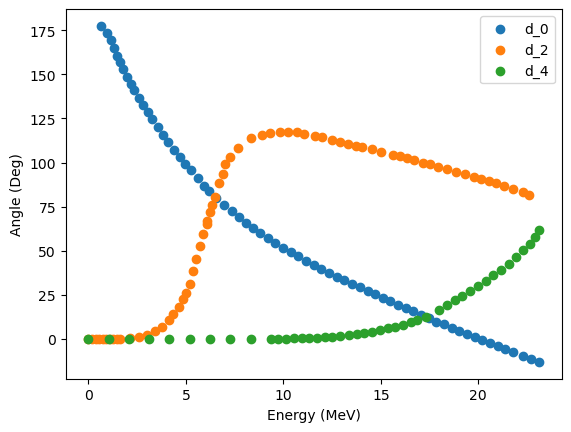

In [6]:
# Plot

plt.Figure
plt.scatter(d0_en, d0_ang, label="d_0")
plt.scatter(d2_en, d2_ang, label="d_2")
plt.scatter(d4_en, d4_ang, label="d_4")
plt.xlabel("Energy (MeV)")
plt.ylabel("Angle (Deg)")
plt.legend(loc='upper right')

In [8]:
common_energy = np.linspace(0.1, 23, 75)

interp_l0 = interp1d(d0_en, d0_ang, kind='cubic', fill_value="extrapolate")
interp_l2 = interp1d(d2_en, d2_ang, kind='cubic', fill_value="extrapolate")
interp_l4 = interp1d(d4_en, d4_ang, kind='cubic', fill_value="extrapolate")

d_l0_interp = interp_l0(common_energy)
d_l2_interp = interp_l2(common_energy)
d_l4_interp = interp_l4(common_energy)

# Create the spline fit (s=0 means interpolate exactly)
#delta_spline_0 = UnivariateSpline(d0_en, d0_ang, s=2)
#delta_spline_2 = UnivariateSpline(d2_en, d2_ang, s=2)
#delta_spline_4 = UnivariateSpline(d4_en, d4_ang, s=2)

#delta_vals_0 = delta_spline_0(common_energy)
#delta_vals_2 = delta_spline_2(common_energy)
#delta_vals_4 = delta_spline_4(common_energy)

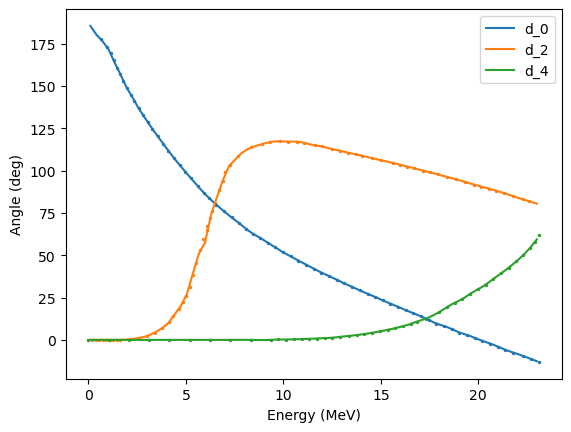

In [9]:
plt.Figure()
#plt.plot(common_energy, delta_vals_0, label="d_0")
#plt.plot(common_energy, delta_vals_2, label="d_2")
#plt.plot(common_energy, delta_vals_4, label="d_4")
plt.plot(common_energy, d_l0_interp, label="d_0")
plt.plot(common_energy, d_l2_interp, label="d_2")
plt.plot(common_energy, d_l4_interp, label="d_4")
plt.scatter(d0_en, d0_ang, s=2)
plt.scatter(d2_en, d2_ang, s=2)
plt.scatter(d4_en, d4_ang, s=2)
plt.xlabel("Energy (MeV)")
plt.ylabel("Angle (deg)")
plt.legend(loc='upper right')
#plt.xlim(0, 5)
#plt.ylim(-1, 5)

In [16]:
W0 = (2*0 + 1) * np.sin(np.radians(d_l0_interp))**2
W2 = (2*2 + 1) * np.sin(np.radians(d_l2_interp))**2
W4 = (2*4 + 1) * np.sin(np.radians(d_l4_interp))**2

W_total = W2 #W0 + W2 + W4

W_total /= np.trapz(W_total, common_energy)  # Normalize area under curve to 1


plt.figure(figsize=(10,6))
plt.plot(common_energy, W_total, label='Total Weighting Function', color='black')
#plt.plot(common_energy, W0, label=r'$L=0$', linestyle='--')
#plt.plot(common_energy, W2, label=r'$L=2$', linestyle='-.')
#plt.plot(common_energy, W4, label=r'$L=4$', linestyle=':')
plt.xlabel('Energy (MeV)')
plt.ylabel('Normalized Weight')
plt.title('Excitation Weighting Function from Phase Shifts')
plt.legend()
plt.grid(True)
#plt.yscale('log')
plt.show()

NameError: name 'd_l0_interp' is not defined

In [9]:
u_to_MeV = 931.494 # 1 u in MeV/c^2
mAlpha=4.002602 * u_to_MeV # mass of alpha
mu_alpha_alpha = mAlpha / 2
hbar = 6.582*10**(-22)  # MeV·s
Z_alpha = 2
e_squared = (4.803*10**(-10))**2  # statC^2
a_alpha_alpha = 3.5 *10**(-13)  # cm (channel radius)

en = 3 # MeV

k_alpha_alpha = np.sqrt(2 * mu_alpha_alpha * en) /(hbar)
eta_alpha_alpha = Z_alpha * Z_alpha * e_squared * mu_alpha_alpha / (hbar * k_alpha_alpha)
kr_alpha_alpha = k_alpha_alpha * a_alpha_alpha

print(kr_alpha_alpha)

56238279870.93905


In [ ]:
import numpy as np

u_to_MeV = 931.494          # MeV/c^2 per u
mAlpha   = 4.002602 * u_to_MeV
mu       = mAlpha / 2.0     # MeV/c^2

HBAR_C = 1.973269805e-11    # MeV·cm
ALPHA  = 0.00729735256 # Fine Structure Constant

Z_alpha = 2
a_alpha_alpha = 3.5e-13     # cm  (3.5 fm)

E = 3.0                     # MeV (CM)

# Correct wave number in cm^-1
k = np.sqrt(2.0 * mu * E) / HBAR_C

# Sommerfeld parameter: η = Z1 Z2 α (μ c^2)/[(ħc) k]
eta = (Z_alpha * Z_alpha) * ALPHA * (mu / (HBAR_C * k))  # dimensionless

# Dimensionless radius ρ = k a
rho = k * a_alpha_alpha

print("k [cm^-1] =", k)
print("eta       =", eta)
print("rho       =", rho)

k [cm^-1] = 5359637189466.427
eta       = 0.5145125022606336
rho       = 1.8758730163132495


In [37]:
# Correct wave number in cm^-1
k = np.sqrt(2.0 * mu_alpha_alpha * 3) / HBAR_C

# Sommerfeld parameter: η = Z1 Z2 α (μ c^2)/[(ħc) k]
eta = (Z_alpha * Z_alpha) * ALPHA * (mu_alpha_alpha / (HBAR_C * k))  # dimensionless

# Dimensionless radius ρ = k a
rho = k * a_alpha_alpha

print(rho)
print(eta)

1.8758730163132495
0.5145125022606336


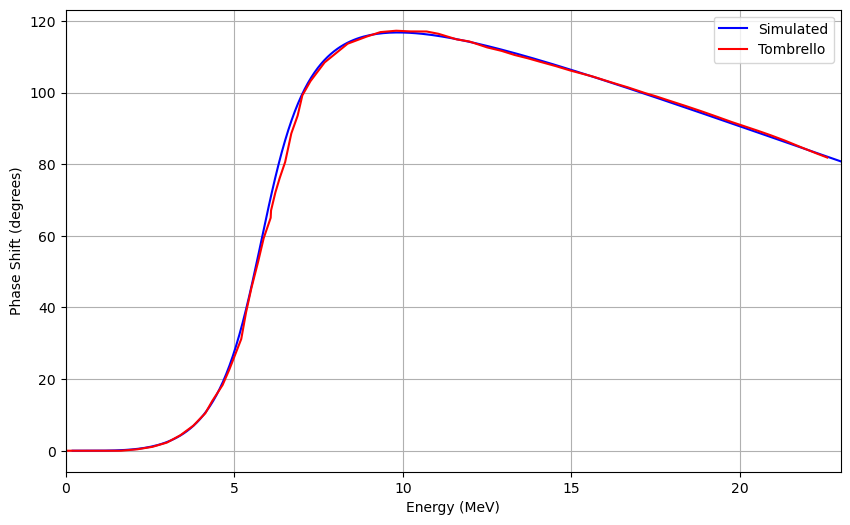

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath

# Set mpmath precision
mpmath.mp.dps = 15

# Constants
u_to_MeV = 931.494          # MeV/c^2 per u
mAlpha   = 4.002602 * u_to_MeV
mu_alpha_alpha       = mAlpha / 2.0     # MeV/c^2
m = mu_alpha_alpha

HBAR_C = 1.973269805e-11    # MeV·cm
ALPHA  = 0.00729735256 # Fine Structure Constant

Z_alpha = 2
Z1 = Z_alpha
Z2 = Z_alpha
a_alpha_alpha = 3.6e-13     # cm  (3.5 fm)
channelRadius_a = a_alpha_alpha

L_az = 2  # d-wave

# Resonance parameters
E_r = 3.18  # MeV (resonance energy)
gamma2 = 3.36  # MeV (reduced width)

# Energy range
energies = np.linspace(0.1, 24.3, 500)

# Arrays to store
delta_list = []
phi_list = []
penetrationFactor_list = []
numerator_list = []
denominator_list = []

# Loop over energies
for E in energies:
    # Correct wave number in cm^-1
    k = np.sqrt(2.0 * m * E) / HBAR_C

    # Sommerfeld parameter:
    eta = (Z1 * Z2) * ALPHA * (m / (HBAR_C * k))  # dimensionless

    # Dimensionless radius:
    rho = k * channelRadius_a

    # Coulomb wavefunctions
    Coulomb_F = float(mpmath.coulombf(L_az, eta, rho, derivative=False))
    Coulomb_G = float(mpmath.coulombg(L_az, eta, rho, derivative=False))

    Coulomb_F_der = float(mpmath.coulombf(L_az, eta, rho, derivative=True))
    Coulomb_G_der = float(mpmath.coulombg(L_az, eta, rho, derivative=True))

    # Hard-sphere Coulomb phase shift Phi_L
    phi = np.arctan2(Coulomb_F, Coulomb_G)
    phi_list.append(phi)

    # Penetrability
    penetrationFactor = (rho) / (Coulomb_F**2 + Coulomb_G**2)
    penetrationFactor_list.append(penetrationFactor)

    # Width and shift correction
    Gamma_E = 2 * penetrationFactor * gamma2

    S_L = (penetrationFactor*(Coulomb_F*Coulomb_F_der + Coulomb_G*Coulomb_G_der))
    delta_lambdaL = -gamma2*(S_L-L_az)

    # Correct phase shift calculation with arctan2
    numerator = 0.5 * Gamma_E
    numerator_list.append(numerator)
    denominator = E_r + delta_lambdaL - E
    denominator_list.append(denominator)
    delta = -phi + np.arctan2(numerator, denominator)
    delta_list.append(delta)

# Convert to arrays
delta_array = np.array(delta_list)
phi_array = np.array(phi_list)
penetrationFactor_array = np.array(penetrationFactor_list)

numerator_Ld_array = np.array(numerator_list)
denominator_Ld_array = np.array(denominator_list)

# Convert phase shift to degrees
delta_deg = np.degrees(delta_list)

# Plot the corrected phase shift
plt.figure(figsize=(10, 6))
plt.plot(energies*2, delta_deg, label='Simulated', color='blue')
plt.plot(d2_en, d2_ang, label="Tombrello", color="red")
plt.xlim(0,23)
plt.xlabel('Energy (MeV)')
plt.ylabel('Phase Shift (degrees)')
#plt.title('Corrected Nuclear Phase Shift $\delta_L(E)$ vs Energy (L=2, a=3.5 fm)')
plt.grid(True)
plt.legend()
plt.show()


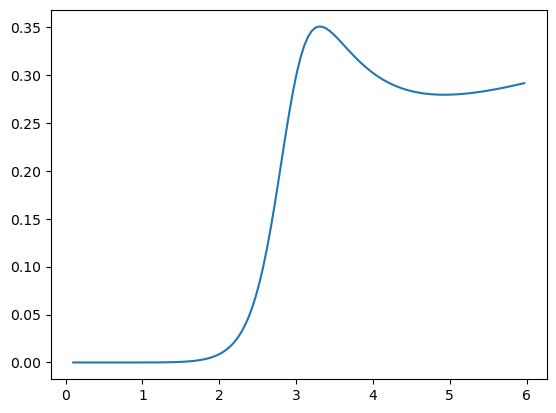

In [13]:
w_i = np.sin(delta_Ld[energies<6])**2
w_i /= np.trapz(w_i,energies[energies<6])

plt.plot(energies[energies<6],w_i)

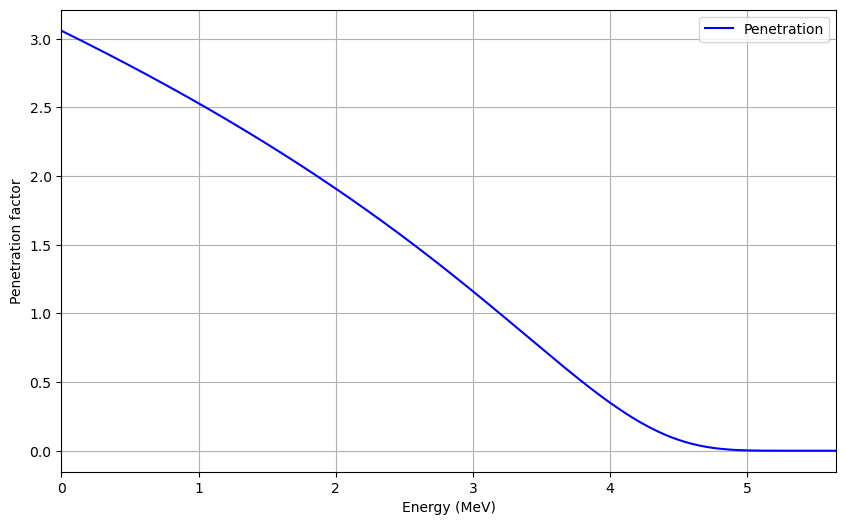

In [ ]:
# Calculate penetration
# p-wave penetrability factor of the primary alpha-particles being emitted from the resonance state in 12C

# Set mpmath precision
mpmath.mp.dps = 50

# Constants
u_to_MeV = 931.494          # MeV/c^2 per u
mAlpha   = 4.002602 * u_to_MeV
mBe8     = 8.005305 * u_to_MeV
# reduced mass
m = (mAlpha*mBe8)/(mAlpha+mBe8)

HBAR_C = 1.973269805e-11    # MeV·cm
ALPHA  = 0.00729735256 # Fine Structure Constant

Z_alpha = 2
Z_Be8 = 4
Z1 = Z_alpha
Z2 = Z_Be8
channelRadius_a = 5.0e-13 # cm  (5.0 fm)

QBe8s=5.65 # Q value of excited Be8
Erel = np.linspace(0.0, 6.0, 400)       # MeV
Qeff = np.clip(QBe8s-Erel,0.0,None)
Qmask = Qeff > 1e-9

en = Qeff[Qmask]

L_az = 1  # p-wave

# Energy range
#energies = np.linspace(0.1, 24.3, 500)

# Arrays to store
penetrationFactor_array = np.zeros_like(Erel)
penetrationFactor_list = []

# Loop over energies
for E in en:
    # Correct wave number in cm^-1
    k = np.sqrt(2.0 * m * E) / HBAR_C

    # Sommerfeld parameter:
    eta = (Z1 * Z2) * ALPHA * (m / (HBAR_C * k))  # dimensionless

    # Dimensionless radius:
    rho = k * channelRadius_a

    # Coulomb wavefunctions
    Coulomb_F = float(mpmath.coulombf(L_az, eta, rho, derivative=False))
    Coulomb_G = float(mpmath.coulombg(L_az, eta, rho, derivative=False))

    # Penetrability
    penetrationFactor = (rho) / (Coulomb_F**2 + Coulomb_G**2)
    penetrationFactor_list.append(penetrationFactor)

# Convert to arrays
penetrationFactor_array[Qmask] = penetrationFactor_list

# Plot the corrected phase shift
plt.figure(figsize=(10, 6))
plt.plot(Erel, penetrationFactor_array, label='Penetration', color='blue')
plt.xlim(0,QBe8s)
plt.xlabel('Energy (MeV)')
plt.ylabel('Penetration factor')
#plt.title('Corrected Nuclear Phase Shift $\delta_L(E)$ vs Energy (L=2, a=3.5 fm)')
plt.grid(True)
plt.legend()
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath as mp

# -----------------------------
# Constants
# -----------------------------
mp.mp.dps = 40  # precision for Coulomb functions

# Units: cgs+MeV (length in cm, energy in MeV)
HBAR_C = 1.973269805e-11   # MeV*cm
ALPHA  = 7.29735256e-3     # fine-structure constant

u_to_MeV = 931.494         # MeV/c^2 per atomic mass unit
m_alpha  = 4.002602 * u_to_MeV     # MeV/c^2
m_be8    = 8.005305 * u_to_MeV     # MeV/c^2

# alpha–alpha (for delta_2) parameters
L_d   = 2                  # d-wave
a_aa  = 3.6e-13            # cm (3.6 fm; was 3.5e-13)
Z1_aa = 2
Z2_aa = 2
mu_aa = 0.5*m_alpha        # reduced mass (a–a)

# Single-level parameters for delta_2 
E_r    = 3.18              # MeV (a–a resonance centroid for L=2 fit curve)
gamma2 = 3.36              # MeV (reduced width)

# Primary alpha penetrability (12C* -> alpha + 8Be)
L_p    = 1                 # p-wave
Z1_p   = 2                 # alpha
Z2_p   = 4                 # 8Be
mu_p   = (m_alpha*m_be8)/(m_alpha + m_be8)
a_p    = 3.0e-13           # cm (5.0 fm typical channel radius)
Q_Be8s = 5.65              # MeV (available to alpha+8Be* when E_rel=0)

# Common E_rel grid (center-of-mass a–a relative energy)
Erel = np.linspace(0.0, 7.0, 600)  # MeV
# Available CM energy for primary alpha emission from 12C* resonance:
Eavail = np.clip(Q_Be8s - Erel, 0.0, None)
mask_phys = Eavail > 1e-9

# -----------------------------
# Functions for Coulomb quantities
# -----------------------------
def coulomb_FG(l, eta, rho, deriv=False):
    """Return (F_l, G_l) or their derivatives at (l, eta, rho)."""
    F = mp.coulombf(l, eta, rho, derivative=deriv)
    G = mp.coulombg(l, eta, rho, derivative=deriv)
    return float(F), float(G)

def k_of(mu, E):
    """Wave number k (cm^-1) for reduced mass mu (MeV/c^2) and energy E (MeV)."""
    return np.sqrt(2.0*mu*E) / HBAR_C

def eta_of(Z1, Z2, mu, k):
    """Sommerfeld parameter eta = Z1 Z2 alpha (mu / hbar k) in our mixed units (dimensionless)."""
    # hbar in these units is HBAR_C/c, but the compact expression below
    # using HBAR_C already accounts for c when using k in cm^-1 and mu, E in MeV.
    return (Z1*Z2)*ALPHA*(mu/(HBAR_C*k))

def penetrability(l, Z1, Z2, mu, a, E):
    """Coulomb penetrability P_l(E) = k a / (F_l^2 + G_l^2)"""
    if E <= 0.0:
        return 0.0
    k = k_of(mu, E)
    rho = k*a
    eta = eta_of(Z1, Z2, mu, k)
    F, G = coulomb_FG(l, eta, rho, deriv=False)
    return float(rho / (F*F + G*G))

def hard_sphere_phi(l, Z1, Z2, mu, a, E):
    """Hard-sphere Coulomb phase atan2(F_l, G_l) at rho=ka."""
    if E <= 0.0:
        return 0.0
    k = k_of(mu, E)
    rho = k*a
    eta = eta_of(Z1, Z2, mu, k)
    F, G = coulomb_FG(l, eta, rho, deriv=False)
    return float(np.arctan2(F, G))

def level_shift_delta_lambda_BeqL(l, Z1, Z2, mu, a, E, gamma2):
    """
    Delta_ lambda L = -gamma^2 [S_l(E) - B], with B=L (hard-sphere choice).
    Using S_l(E) = P_l * (F F' + G G') at rho=ka.
    """
    if E <= 0.0:
        return 0.0
    k = k_of(mu, E)
    rho = k*a
    eta = eta_of(Z1, Z2, mu, k)
    F, G     = coulomb_FG(l, eta, rho, deriv=False)
    Fp, Gp   = coulomb_FG(l, eta, rho, deriv=True)
    P        = float(rho / (F*F + G*G))
    S_l      = P*(F*Fp + G*Gp)
    B        = float(l)
    return float(-gamma2*(S_l - B))


In [5]:
# -----------------------------
# Build W0(E_rel) = sin^2 delta2(E_rel)
# -----------------------------
W0 = np.zeros_like(Erel)
delta = np.zeros_like(Erel)
GammaE = np.zeros_like(Erel)
dlam = np.zeros_like(Erel)
wigner_dist = np.zeros_like(Erel)

for i, E in enumerate(Erel):
    if E <= 0.0:
        W0[i] = 0.0
        continue # Continue only for positive E

    # hard-sphere Coulomb phase
    phi = hard_sphere_phi(L_d, Z1_aa, Z2_aa, mu_aa, a_aa, E)

    # penetrability for L=2 (enters width via Gamma(E) = 2P gamma^2)
    Pd  = penetrability(L_d, Z1_aa, Z2_aa, mu_aa, a_aa, E)
    GammaE[i] = 2.0*Pd*gamma2

    # optional level shift with B=L
    dlam[i] = level_shift_delta_lambda_BeqL(L_d, Z1_aa, Z2_aa, mu_aa, a_aa, E, gamma2)

    # single-level phase (Coulomb-modified): delta = -Phi_l + atan2(Gamma/2, E_r+delta lambda-E)
    delta[i] = -phi + np.arctan2(0.5*GammaE[i], (E_r + dlam[i] - E))
    W0[i] = np.sin(delta[i])**2
    wigner_dist[i] = GammaE[i]**2/((E-(3.18+dlam[i]))**2+GammaE[i]**2/4)

# Normalize W0 on the physical region if desired (optional)
# area_W0 = np.trapz(W0, Erel)
# if area_W0 > 0: W0 /= area_W0

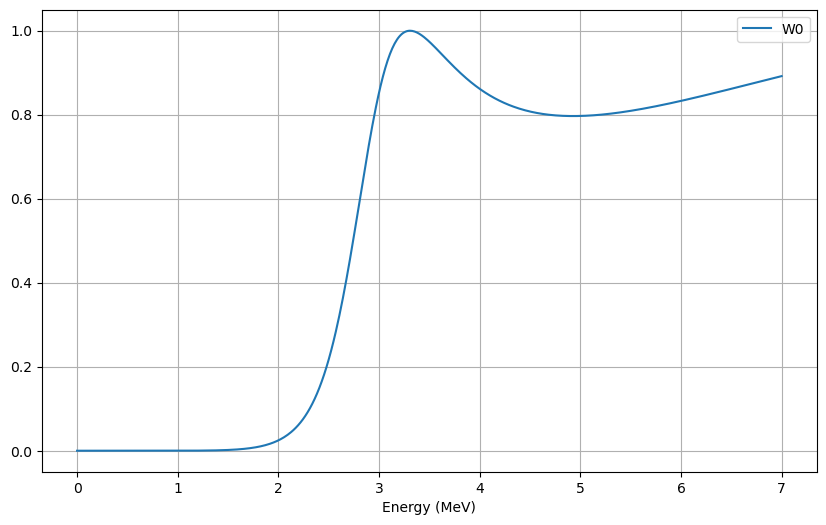

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(Erel, W0, label="W0")
plt.xlabel('Energy (MeV)')
plt.grid(True)
plt.legend()
plt.show()

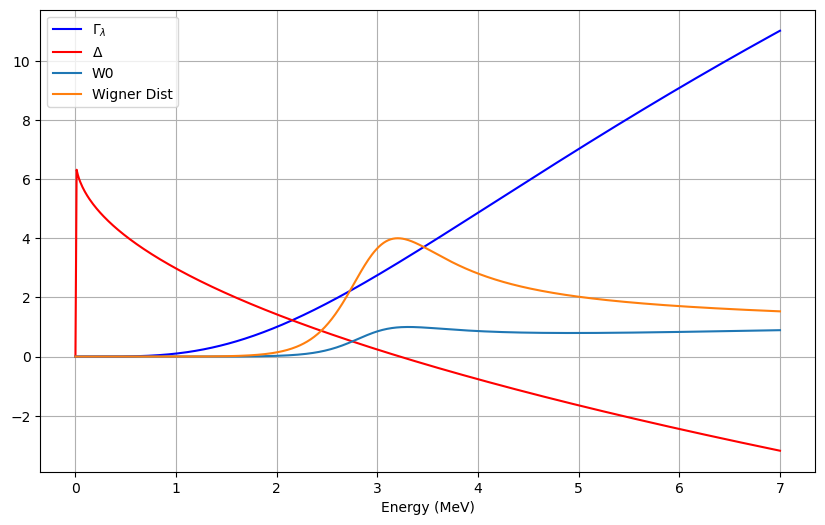

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(Erel, GammaE, label=r'$\Gamma_{\lambda}$', color='blue')
plt.plot(Erel, dlam, label=r"$\Delta$", color="red")
plt.plot(Erel, W0, label="W0")
plt.plot(Erel, wigner_dist,label="Wigner Dist")
plt.xlabel('Energy (MeV)')
plt.grid(True)
plt.legend()
plt.show()

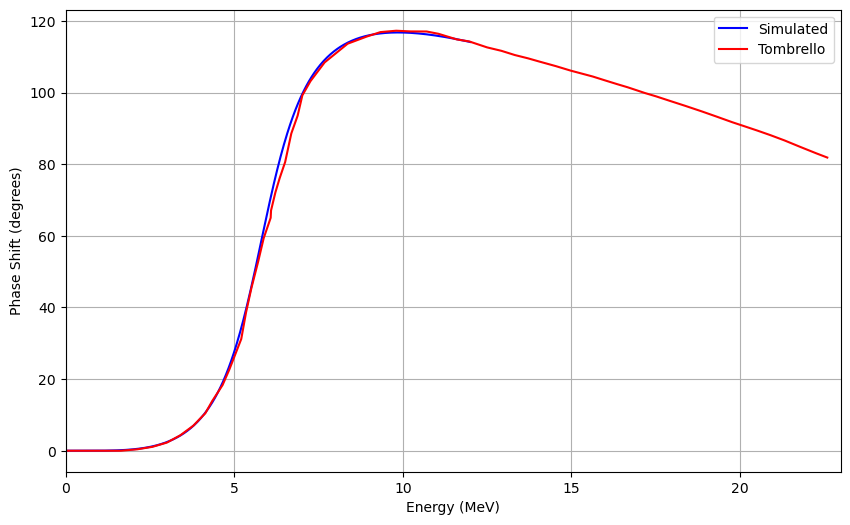

In [ ]:
# Convert phase shift to degrees
delta_deg = np.degrees(delta)

# Plot the corrected phase shift
plt.figure(figsize=(10, 6))
plt.plot(2*Erel, delta_deg, label='Simulated', color='blue')
plt.plot(d2_en, d2_ang, label="Tombrello", color="red")
plt.xlim(0,23)
plt.xlabel('Energy (MeV)')
plt.ylabel('Phase Shift (degrees)')
#plt.title('Corrected Nuclear Phase Shift $\delta_L(E)$ vs Energy (L=2, a=3.5 fm)')
plt.grid(True)
plt.legend()
plt.show()

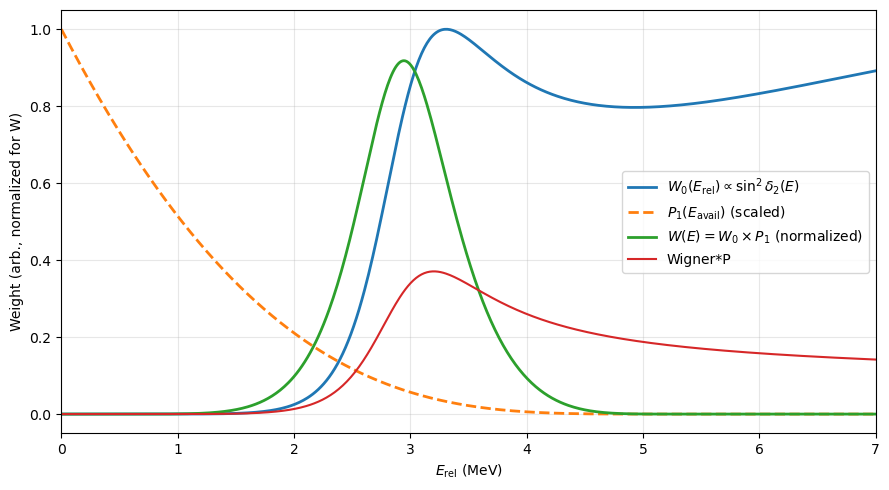

In [9]:
# -----------------------------
# Build P1(E_avail) on SAME grid
# -----------------------------
a_p    = 0.05e-13 
P1 = np.zeros_like(Erel)
#t_Wiger_dist = np.zeros_like(Erel)
for i, Eav in enumerate(Eavail):
    P1[i] = penetrability(L_p, Z1_p, Z2_p, mu_p, a_p, Eav) if Eav > 0.0 else 0.0
    #t_Wiger_dist[i] = 1/((1.5**2)/4+(Eav-3.18)**2)*P1[i] if Eav > 0.0 else 0.0



# -----------------------------
# Final weighting: multiply and renormalize
# -----------------------------
W_mult = W0 * P1
# (Optionally only normalize where E_avail>0; here that's already zeroed by P1.)
area = np.trapz(W_mult, Erel)
W_final = W_mult / area if area > 0 else W_mult

norm_wigner_dist = wigner_dist#*P1
area = np.trapz(norm_wigner_dist, Erel)
norm_wigner_dist = norm_wigner_dist/area



# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(9,5))
plt.plot(Erel, W0,      label=r"$W_0(E_{\rm rel})\propto \sin^2\delta_2(E)$", lw=2)
plt.plot(Erel, P1/np.max(P1[mask_phys]) if np.any(mask_phys) else P1, 
         label=r"$P_1(E_{\rm avail})$ (scaled)", lw=2, ls='--')
plt.plot(Erel, W_final, label=r"$W(E)=W_0\times P_1$ (normalized)", lw=2)
plt.plot(Erel, norm_wigner_dist, label = "Wigner*P")
plt.xlim(0.0, 7.0)
plt.xlabel(r"$E_{\rm rel}$ (MeV)")
plt.ylabel("Weight (arb., normalized for W)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
# Now need to compare it to a histogram.

# Load energies from file
Erel_data = np.loadtxt("Erel_samples.csv", delimiter=",", usecols=[0],skiprows=1)

bins = 200
counts, edges = np.histogram(Erel_data,bins=bins, range=(Erel[0],Erel[-1]),density=True)
centers = 0.5*(edges[:-1]+edges[1:])
pdf = counts.astype(float)

#area = np.trapz(pdf,centers)
#pdf=pdf/area if area>0 else pdf

Wf_on_grid = np.interp(Erel,centers,pdf,left=0,right=0)

# Renormalize
area = np.trapz(Wf_on_grid,Erel)
if area > 0:
    Wf_on_grid/=area

<function matplotlib.pyplot.show(close=None, block=None)>

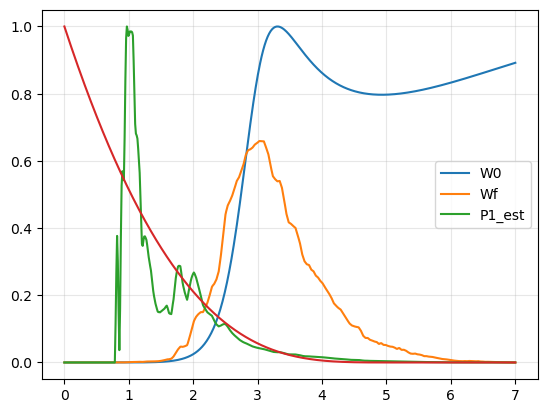

In [11]:
eps = 1e-12
mask = W0>eps

P1_est = np.zeros_like(Erel)
P1_est[mask] = Wf_on_grid[mask]/W0[mask]

plt.plot(Erel,W0, label="W0")
plt.plot(Erel,Wf_on_grid,label="Wf")
plt.plot(Erel,P1_est/max(P1_est),label="P1_est")
plt.plot(Erel, P1/np.max(P1[mask_phys]))
plt.grid(True,alpha=0.3)
plt.legend()
plt.show

In [ ]:
def P1_on_grid(Erel, Q_Be8s, L_p, Z1_p, Z2_p, mu_p, a_p):
    Eavail = np.clip(Q_Be8s - Erel, 0.0, None)
    P1 = np.zeros_like(Erel)
    for i, Eav in enumerate(Eavail):
        P1[i] = penetrability(L_p, Z1_p, Z2_p, mu_p, a_p, Eav) if Eav > 0 else 0.0
    return P1

def best_C(y, x):
    # minimizes || y - C x ||^2
    denom = np.dot(x, x)
    return 0.0 if denom == 0 else np.dot(x, y) / denom

# Choose fit region to avoid W0 ~ 0 blowups
mask_fit = (Erel >= 0.0) & (Erel <= Q_Be8s) & (W0 > 1e-6*np.max(W0)) & (Wf_on_grid > 0)

a_grid = np.linspace(0.5e-13, 7.0e-13, 120)  # fm in cm
best = None

for a_try in a_grid:
    P1_try = P1_on_grid(Erel, Q_Be8s, L_p, Z1_p, Z2_p, mu_p, a_try)
    x = (W0 * P1_try)[mask_fit]
    y = Wf_on_grid[mask_fit]

    C_try = best_C(y, x)
    resid = y - C_try * x
    sse = np.dot(resid, resid)

    if (best is None) or (sse < best["sse"]):
        best = {"a_p": a_try, "C": C_try, "sse": sse}

print("Best a_p (cm):", best["a_p"], "  in fm:", best["a_p"]/1e-13)
print("Best C:", best["C"])

Best a_p (cm): 3.340336134453782e-13   in fm: 3.3403361344537816
Best C: 2.3149481299213144


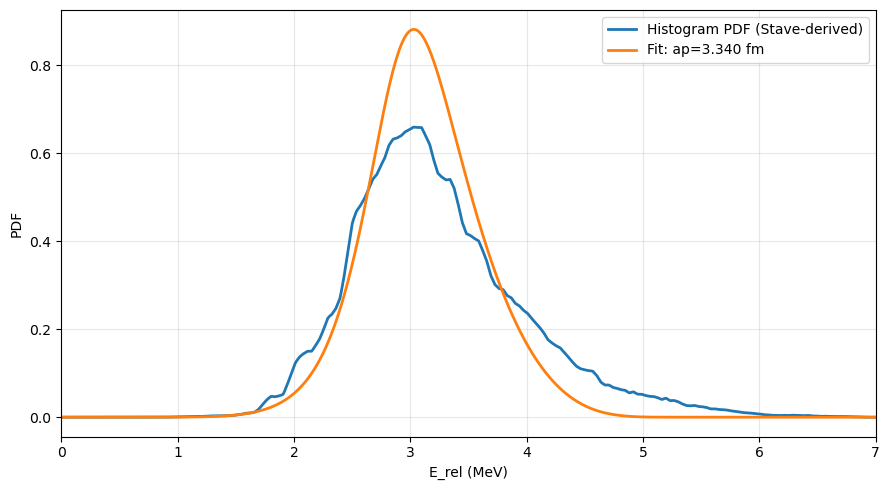

In [14]:
P1_best = P1_on_grid(Erel, Q_Be8s, L_p, Z1_p, Z2_p, mu_p, best["a_p"])
Wfit = best["C"] * W0 * P1_best

# normalize Wfit to compare as PDFs (optional but common)
Wfit /= np.trapz(Wfit, Erel)

plt.figure(figsize=(9,5))
plt.plot(Erel, Wf_on_grid, label="Histogram PDF (Stave-derived)", lw=2)
plt.plot(Erel, Wfit, label=f"Fit: ap={best['a_p']/1e-13:.3f} fm", lw=2)
plt.xlim(0, 7)
plt.xlabel("E_rel (MeV)")
plt.ylabel("PDF")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import coulombf, coulombg, mp
from scipy.interpolate import interp1d


# Set mpmath precision
mp.dps = 15

def compute_weighting_function_Be8(num_points=300):
    """
    Compute the weighting function W(E) = P_3(E) * sin^2(delta_2(E)) for 8Be energy distribution.

    Args:
        E_res (float): Resonance energy in MeV.
        Gamma (float): Width of the resonance in MeV.
        a (float): Channel radius in fm.
        num_points (int): Number of energy grid points.

    Returns:
        energies (np.ndarray): Energy values in MeV.
        W_E (np.ndarray): Normalized weighting function.
    """
    # Constants
    hbar_c = 197.327  # MeV·fm
    e_squared = 1.4399764  # MeV·fm
    E_res = 3.18
    Gamma = 1.5 # 0.3
    a = 5.5


    # Reduced masses
    #mu_alpha = (4 * 4) / (4 + 4) * 931.5  # MeV/c^2 for alpha-alpha
    mu_c12 = (4 * 12) / (4 + 12) * 931.5  # MeV/c^2 for alpha-12C

    # Charges
    #Z1_alpha, Z2_alpha = 2, 2
    Z1_c12, Z2_c12 = 2, 6

    # Energy range
    energies = np.linspace(0.1, 20.0, num_points)

    # Simulated δ2(E)
    delta_2 = np.arctan2(Gamma / 2, E_res - energies)
    sin2_delta_2 = np.sin(delta_2)**2

    # Calculate penetrability for l=3
    penetrability_f_wave = []
    for E in energies:
        k = np.sqrt(2 * mu_c12 * E) / hbar_c
        eta = Z1_c12 * Z2_c12 * e_squared * mu_c12 / (hbar_c**2 * k)
        ka = k * a
        F_L = float(coulombf(3, eta, ka, derivative=False))
        G_L = float(coulombg(3, eta, ka, derivative=False))
        P_L = (k * a) / (F_L**2 + G_L**2)
        penetrability_f_wave.append(P_L)

    penetrability_f_wave = np.array(penetrability_f_wave)

    # Compute and normalize the weighting function
    W_E = sin2_delta_2 * penetrability_f_wave
    W_E /= np.trapz(W_E, energies)

    return energies, W_E

def sample_weighted_energy(energies, weights, n_samples):
    """
    Directly sample n_samples energy values from a normalized weighting function.

    Args:
        energies (np.ndarray): Array of energy values (x-axis).
        weights (np.ndarray): Normalized weights (probability distribution, should integrate to 1).
        n_samples (int): Number of samples to draw.

    Returns:
        np.ndarray: Array of sampled energy values.
    """
    # Ensure weights are normalized
    weights = weights / np.trapz(weights, energies)

    # Compute cumulative distribution function (CDF)
    cdf = np.cumsum(weights)
    cdf /= cdf[-1]  # Normalize to 1

    # Create inverse CDF interpolator
    inverse_cdf = interp1d(cdf, energies, kind='linear', bounds_error=False, fill_value=(energies[0], energies[-1]))

    # Sample uniformly from [0,1], map through inverse CDF
    uniform_samples = np.random.rand(n_samples)
    sampled_energies = inverse_cdf(uniform_samples)

    return sampled_energies

# Recreate weighting function from Stave's data.

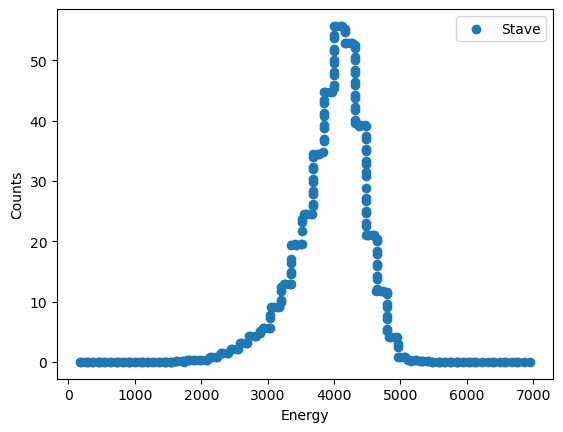

In [32]:
# Now let's look at Stave's alpha spectrum.

alpha1_histData = []

# opening the CSV file  
with open('StavePrimaryAlphas.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        alpha1_histData.append([float(lines[0]),float(lines[1])])

alpha1_histData = np.array(alpha1_histData)

en_alpha1_stave = alpha1_histData[:,0]
cnts_alpha1_stave = alpha1_histData[:,1]

# sort & sanitize
order = np.argsort(en_alpha1_stave)
en_alpha1_stave, cnts_alpha1_stave = en_alpha1_stave[order], cnts_alpha1_stave[order]
mask = np.isfinite(en_alpha1_stave) & np.isfinite(cnts_alpha1_stave)
en_alpha1_stave, cnts_alpha1_stave = en_alpha1_stave[mask], np.clip(cnts_alpha1_stave[mask], 0.0, None)

plt.scatter(en_alpha1_stave,cnts_alpha1_stave,label="Stave")
plt.xlabel("Energy")
plt.ylabel("Counts")
plt.legend()

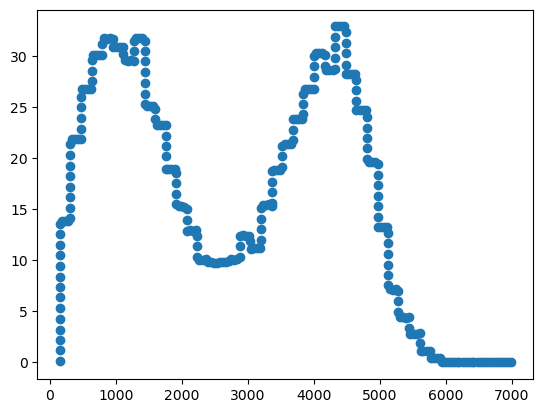

In [34]:
alpha2_histData = []

#alpha2_en = []
#alpha2_counts = []

# opening the CSV file  
with open('StaveSecondaryAlphas.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        alpha2_histData.append([float(lines[0]),float(lines[1])])

alpha2_histData = np.array(alpha2_histData,float)

en_alpha2_stave = alpha2_histData[:,0]
cnts_alpha2_stave = alpha2_histData[:,1]

# sort & sanitize data
order = np.argsort(en_alpha2_stave)
en_alpha2_stave, cnts_alpha2_stave = en_alpha2_stave[order], cnts_alpha2_stave[order]
mask = np.isfinite(en_alpha2_stave) & np.isfinite(cnts_alpha2_stave)
en_alpha2_stave, cnts_alpha2_stave = en_alpha2_stave[mask], np.clip(cnts_alpha2_stave[mask], 0.0, None)

plt.scatter(en_alpha2_stave,cnts_alpha2_stave)

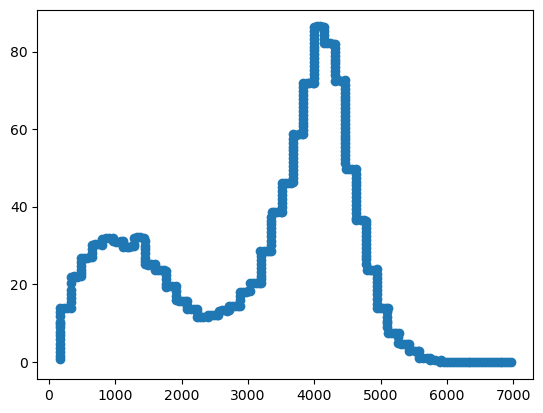

In [35]:
simulation_histData = []

# opening the CSV file  
with open('StaveSimulation.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        simulation_histData.append([float(lines[0]),float(lines[1])])

simulation_histData = np.array(simulation_histData)

en_stave_simulation = simulation_histData[:,0]
cnts_stave_simulation = simulation_histData[:,1]

# sort & sanitize data
order = np.argsort(en_stave_simulation)
en_stave_simulation, cnts_stave_simulation = en_stave_simulation[order], cnts_stave_simulation[order]
mask = np.isfinite(en_stave_simulation) & np.isfinite(cnts_stave_simulation)
en_stave_simulation, cnts_stave_simulation = en_stave_simulation[mask], np.clip(cnts_stave_simulation[mask], 0.0, None)

plt.scatter(simulation_histData[:,0],simulation_histData[:,1])



In [160]:
t = np.array([1,2,3,4,5])

t[1:]

array([2, 3, 4, 5])

In [36]:
def sample_alpha_spectrum(energies, weights, n_samples, *, smooth_sigma=0.0, rng=None):

    """
    Directly sample n_samples energy values from a normalized weighting function.

    Args:
        energies (np.ndarray): Array of energy values (x-axis).
        weights (np.ndarray): Normalized weights (probability distribution, should integrate to 1).
        n_samples (int): Number of samples to draw.
        smooth_sigma : float, optional (default 0.0)
            Gaussian smoothing width in *points* along the digitized curve.
            Use 0.5 - 1.0 to gently suppress pixel/zig-zag noise from digitization.
            0.0 disables smoothing.
        rng : np.random.Generator or None
            Optional RNG for reproducibility (np.random.default_rng(seed)).

    Returns:
        np.ndarray: Array of sampled energy values.
    """

    # Gaussian smoothing in index space
    if smooth_sigma > 0:
        # kernel half-width (points)
        # set of weights
        k = int(max(2, 3*smooth_sigma)) #Keep above 2.
        xk = np.arange(-k, k+1)
        # Use a form that makes smooth_sigma the standard deviation
        g = np.exp(-0.5*(xk/smooth_sigma)**2)
        g /= g.sum()
        # reflect-pad to avoid edge losses; convolve only Y (not E)
        Y_padded = np.pad(weights, (k, k), mode='reflect')
        Y = np.convolve(Y_padded, g, mode='valid')

    # build normalized CDF via trapezoid rule on irregular grid
    F = np.empty_like(energies)
    F[0] = 0.0
    F[1:] = np.cumsum(0.5 * (Y[:-1] + Y[1:]) * np.diff(energies))
    total = F[-1]
    F /= total  # normalize to [0,1]

    # inverse-CDF sampling
    rng = np.random.default_rng() if rng is None else rng
    u = rng.random(int(n_samples))
    return np.interp(u, F, energies)

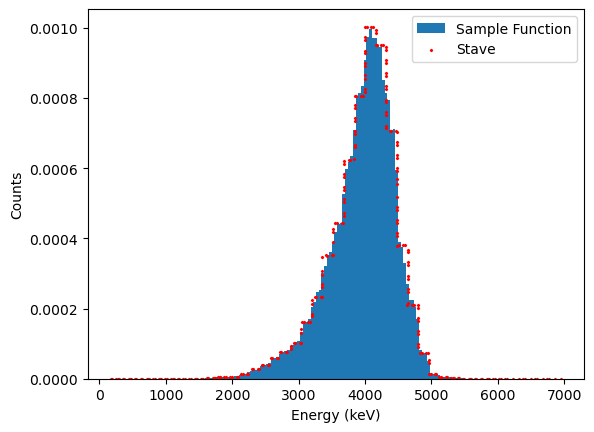

In [37]:
# Normalize using trapezoidal rule
area = np.trapz(cnts_alpha1_stave, en_alpha1_stave)
y_norm = cnts_alpha1_stave / area

se_1 = sample_alpha_spectrum(en_alpha1_stave, cnts_alpha1_stave, 601977,smooth_sigma=1) #11977
plt.hist(se_1,bins=100, density=True,label="Sample Function")
plt.scatter(en_alpha1_stave,y_norm,label="Stave",marker="x",s=2,c="r")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.legend()
plt.show()

In [38]:
def Q_calc(m1, m3, m4, theta_L_deg, en1, en3):
    """
        Calculate the Q of the reaction.

        Args:
            m1 (float): mass of the initial particle
            m3 (float): mass of the product particle 
            m4 (float): mass of the product particle
            theta_L_deg (float or array-like): scattering angle in degrees
            en1 (float): energy of the initial particle
            en3 (float): energy of product particle

        Returns:
            Q: array of the Q value for each scattering angle in theta_L
        """
    # Convert to numpy arrays
    m1 = np.asarray( m1, dtype=float)
    m3 = np.asarray( m3, dtype=float)
    m4 = np.asarray( m4, dtype=float)
    en1 = np.asarray( en1, dtype=float)
    en3 = np.asarray( en3, dtype=float)

    # Convert theta_L to radians for later use in calculations.
    theta_L = np.radians(theta_L_deg)

    Q = en3*(1+m3/m4) - en1*(1-m1/m4) - 2*np.sqrt(m1*en1*m3*en3)/m4*np.cos(theta_L)

    # Return the Q values.
    return Q

def en3_calc(m1, m3, m4, theta_L_deg, Q, en1):
    """
        Calculate the energy of a particle produced.

        Args:
            m1 (float): mass of the initial particle
            m3 (float): mass of the product particle that is being solved
            m4 (float): mass of the product particle
            theta_L_deg (float or array-like): scattering angle in degrees
            Q (float): Q-value of reaction
            en1 (float): energy of the initial particle

        Returns:
            np.array: array of the final particle energies for each scattering angle in theta_L
        """
    # Convert to numpy arrays
    m1 = np.asarray( m1, dtype=float)
    m3 = np.asarray( m3, dtype=float)
    m4 = np.asarray( m4, dtype=float)
    Q = np.asarray( Q, dtype=float)
    en1 = np.asarray( en1, dtype=float)

    # Convert theta_L to radians for later use in calculations.
    theta_L = np.radians(theta_L_deg)

    # Calculate intermediate quantities v and w.
    v = np.sqrt(m1*m3*en1)/(m3+m4)*np.cos(theta_L)
    w = (m4*Q+en1*(m4-m1))/(m3+m4)
    
    # Calculate and remove negative values in the energy calculation.
    en_test = v**2+w
    # Get rid of negative due to roundoff
    en_test = np.where(en_test >= 0.0, en_test,np.nan)

    # Calculate the final energies of the particle by adding/subtracting the square root of the positive/negative energy part.
    e3p_sqrt = v + np.sqrt(en_test)
    e3n_sqrt = v - np.sqrt(en_test)

    # Check if energies are negative by setting negative values to NaN.
    e3p_sqrt = np.where(e3p_sqrt >= 0.0,e3p_sqrt, np.nan)
    e3n_sqrt = np.where(e3n_sqrt >= 0.0,e3n_sqrt, np.nan)

    # Use e3p_sqrt if not a nan.
    # Otherwise use e3n_sqrt
    e3_sqrt = np.where(~np.isnan(e3p_sqrt),e3p_sqrt,e3n_sqrt)

    # Return the final particle energy values.
    return e3_sqrt**2

## Use edges of alpha_0 peak to approximate angles accepted by detector.

In [41]:
##Constants

u_to_MeV = 931.494 # 1 u in MeV/c^2
mp=1.00727646 * u_to_MeV # mass of proton
mB11=11.0093052 * u_to_MeV # mass of B11
mAlpha=4.002602 * u_to_MeV # mass of alpha
mBe8=8.00530510 * u_to_MeV # mass of Be8

QBe8=8.586 # Q value of Be8

enp_lab = 0.675 # MeV energy of proton

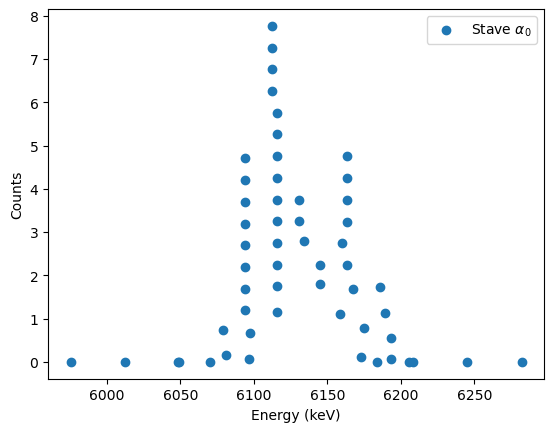

In [114]:
#6.2229 - 6.0573
# simga angle^2 + sigma detector^2
# FWHM^2 - detect resolution^2
#np.sqrt(170**2-17**2)

# Now let's look at Stave's alpha spectrum.

alpha0_histData = []

# opening the CSV file  
with open('Stave_alpha_0.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        alpha0_histData.append([float(lines[0]),float(lines[1])])

alpha0_histData = np.array(alpha0_histData)

en_alpha0_stave = alpha0_histData[:,0]
cnts_alpha0_stave = alpha0_histData[:,1]

# sort & sanitize
order = np.argsort(en_alpha0_stave)
en_alpha0_stave, cnts_alpha0_stave = en_alpha0_stave[order], cnts_alpha0_stave[order]
mask = np.isfinite(en_alpha0_stave) & np.isfinite(cnts_alpha0_stave)
en_alpha0_stave, cnts_alpha0_stave = en_alpha0_stave[mask], np.clip(cnts_alpha0_stave[mask], 0.0, None)

plt.scatter(en_alpha0_stave,cnts_alpha0_stave,label="Stave $\\alpha_0$")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.legend()

In [100]:
def find_peak_edges(energies, counts, frac=0.1):
    """
    Find left and right edges of a peak using a fractional threshold.

    Parameters
    ----------
    energies : array
        Bin centers.
    counts : array
        Histogram counts.
    frac : float
        Fraction of peak height (0.1 = 10%) above background to define edges.

    Returns
    -------
    E_left, E_right : float
        Energy at left and right edges (MeV).
    """

    # Estimate background as the minimum counts in the spectrum
    background = counts.min()

    # Peak maximum above background
    peak_height = counts.max() - background
    threshold = background + frac * peak_height

    # Find indices where counts cross threshold
    above = counts >= threshold
    idx = np.where(above)[0]

    if len(idx) == 0:
        raise ValueError("No peak found above threshold.")

    left_idx, right_idx = idx[0], idx[-1]

    # Interpolate for more accurate edge positions
    def interp_edge(i1, i2):
        c1, c2 = counts[i1], counts[i2]
        E1, E2 = energies[i1], energies[i2]
        return E1 + (threshold - c1) * (E2 - E1) / (c2 - c1)

    E_left = interp_edge(left_idx-1, left_idx) if left_idx > 0 else energies[left_idx]
    E_right = interp_edge(right_idx, right_idx+1) if right_idx < len(counts)-1 else energies[right_idx]

    return E_left, E_right

In [101]:
rightEdge_alpha_0,leftEdge_alpha_0 = find_peak_edges(en_alpha0_stave, cnts_alpha0_stave, frac=0.1)

# Convert from keV to MeV
rightEdge_alpha_0 = rightEdge_alpha_0/1000
leftEdge_alpha_0 = leftEdge_alpha_0/1000

print(rightEdge_alpha_0)
print(leftEdge_alpha_0)

6.086361743021449
6.191652024903375


In [102]:
# Edges of alpha_0 peak

#rightEdge_alpha_0 = 6.2229 # MeV
#leftEdge_alpha_0 = 6.0573 # MeV

def solve_angle_from_peak(E_peak):
    f = lambda theta_deg:float(np.asarray(en3_calc(mp, mAlpha, mBe8, theta_deg, QBe8, enp_lab) - E_peak))
    theta_est = brentq(f, 1.0, 179.0)  # search in 1–179 degrees
    return theta_est


lowerAngleDeg = solve_angle_from_peak(rightEdge_alpha_0)
higherAngleDeg = solve_angle_from_peak(leftEdge_alpha_0)

print(lowerAngleDeg)
print(higherAngleDeg)

92.62475541629296
83.76550158670901


In [1]:
92.62475541629296 - 83.76550158670901

8.859253829583949

In [2]:
(92.62475541629296 + 83.76550158670901)/2

88.19512850150099

In [39]:
# Now sample over uniform cos(theta)

def sample_thetaL_cos_uniform(n, th_min_deg, th_max_deg, rng=None):
    """
    Sample theta in lab frame between two angles in degrees. The function samples over uniform cos(theta)

    Parameters
    ----------
    n : array
        Number of samples.
    th_min_deg : float
        Minimum angle in lab frame.
    th_max_deg : float
        Maximum angle in lab frame.

    Returns
    -------
    theta : array
        Sampled angles in lab frame.
    """
    rng = np.random.default_rng() if rng is None else rng
    cos_min = np.cos(np.radians(th_max_deg))
    cos_max = np.cos(np.radians(th_min_deg))
    u = rng.random(int(n))
    cos_th = cos_min + (cos_max - cos_min)*u
    return np.degrees(np.arccos(cos_th))

In [42]:
se_1 = sample_alpha_spectrum(en_alpha1_stave, cnts_alpha1_stave, 10**6, smooth_sigma=1) # keV

se_1 = se_1/1000 # MeV

lowerAngleDeg = 94
higherAngleDeg = 86
theta_L_deg = sample_thetaL_cos_uniform(len(se_1), lowerAngleDeg, higherAngleDeg, rng=None)

Q_values = Q_calc(mp, mAlpha, mBe8, theta_L_deg, enp_lab, se_1)

samp_en_int_Be8  = QBe8 - Q_values

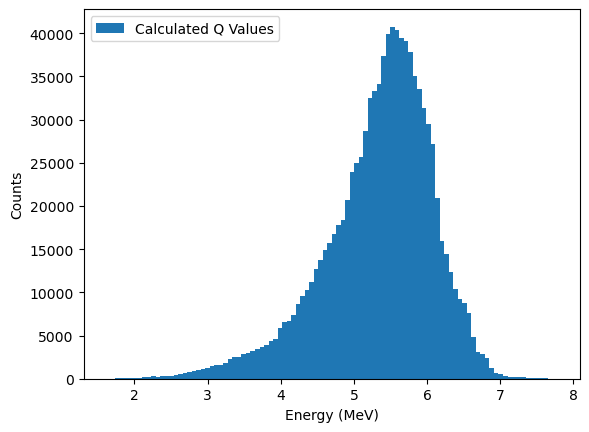

In [43]:
_ = plt.hist(Q_values,bins=100,label="Calculated Q Values")
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.legend()
plt.show()

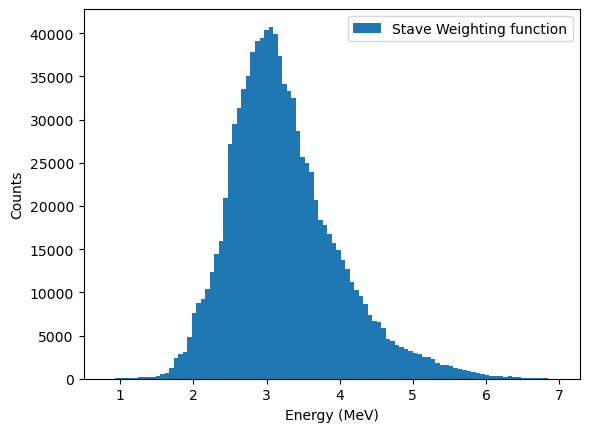

In [44]:
_ = plt.hist(samp_en_int_Be8,bins=100,label="Stave Weighting function")
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.legend()
plt.show()

In [45]:
total_reactions = len(samp_en_int_Be8)

# Effective Q-value
Q_eff = QBe8 - samp_en_int_Be8

en_alpha_01 = en3_calc(mp, mAlpha, mBe8, theta_L_deg, Q_eff, enp_lab)

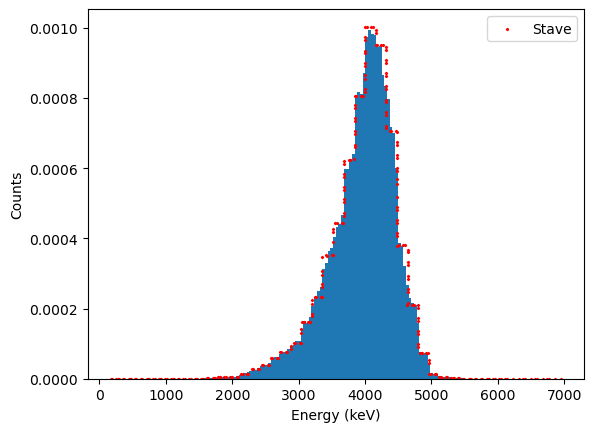

In [46]:
_ = plt.hist(en_alpha_01*1000,100,density=True)
plt.scatter(en_alpha1_stave,y_norm,label="Stave",marker="x",s=2,c="r")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.legend()
plt.show()

In [48]:
Erel = samp_en_int_Be8
np.savetxt("Erel_samples.csv", Erel, delimiter=",", header="Erel_MeV", comments="")